In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import quad

from matplotlib.backends.backend_pdf import PdfPages
black = [0,0,0]
red   = [1,0,0]
blue  = [0,0,1]

#+++++++++++++++++++++++++++++
from matplotlib import rcParams
config = {
	'font.family':'Times New Roman',
    'text.usetex': True,
	}
rcParams.update(config)
#plt.style.use('science')

#+++++++++++++++++++++++++++++

def distance_modulus(z:float, h:float=0.7, O_m:float=0.27):
    """
    Returns the distance modulus for a given input redshift, h (Hubble parameter), and matter density.
    We assume flat Lambda-CDM and that radiation is negligible.

    Input:
    - z: redshift
    - h: Hubble constant is H_0 = 100h km/s/Mpc
    - O_m: Omega_m, matter-related energy density parameter

    Output:
    - Distance modulus of the object, as a float

    Notes:
    - the integration is done using numpy integration methods.
    """
    def E(z, O_m_param):
        return 1/np.sqrt( O_m_param * (1.+z)**(3) + 1. - O_m_param )
    integral = quad( E, 0., z, args=(O_m), )
    # I got warnings that sometimes the distance can be negative, so placing this
    # warning to indicate that this has happened.
    if integral[0] < 0.:
        print("Warning: Distance called as <0, for z = %.2f"%(z))
    distance = (1+z) * integral[0] / (100. * h ) * 3.e5# Which is output in Mpc
    # Note: the 3.e5 comes from the extra speed of light factor
    # Note: This distance is derived from the Luminosity distance

    if integral[1]/integral[0] > 0.001:
        raise PermissionError("The error is too big!!!")
    
    return 5 * np.log10(distance / 1.e-5)# where the extra e3 in the denominator comes from 10pc -> 10e-5 Mpc
Distance_modulus = np.vectorize(distance_modulus)

In [38]:
def lum_distance(z:float, h:float=0.7, O_m:float=0.27):
    def E(z, O_m_param):
        return 1/np.sqrt( O_m_param * (1.+z)**(3) + 1. - O_m_param )
    integral = quad( E, 0., z, args=(O_m), )
    # I got warnings that sometimes the distance can be negative, so placing this
    # warning to indicate that this has happened.
    if integral[0] < 0.:
        print("Warning: Distance called as <0, for z = %.2f"%(z))
    distance = (1+z) * integral[0] / (100. * h ) * 3.e5# Which is output in Mpc
    return distance

Lum_distance = np.vectorize(lum_distance)

In [39]:
def approx_lum_dist(z, h=0.7, O_m=0.27):
    """
    Returns the approximate luminosity distance for a given input redshift, h (Hubble parameter), and matter density.
    We assume flat Lambda-CDM and that radiation is negligible.
    This is the approximation for small z, where we can use a Taylor expansion.

    Input:
    - z: redshift
    - h: Hubble constant is H_0 = 100h km/s/Mpc
    - O_m: Omega_m, matter-related energy density parameter

    Output:
    - Approximate distance modulus of the object, as a float
    """
    return (1+z) * (3.e5 / (100.*h))*z # / np.sqrt(O_m) # in Mpc

def approx_hypergeometric(z, h=0.7, O_m=0.27):
    """
    Returns the approximate luminosity distance for a given input redshift, h (Hubble parameter), and matter density.
    We assume flat Lambda-CDM and that radiation is negligible.
    This is the approximation for small z, where we can use a Taylor expansion.

    Input:
    - z: redshift
    - h: Hubble constant is H_0 = 100h km/s/Mpc
    - O_m: Omega_m, matter-related energy density parameter

    Output:
    - Approximate distance modulus of the object, as a float
    """
    return (1+z) * (3.e5 / (100.*h)) / np.sqrt(1.-O_m) * (
        (1+z) * sp.special.hyp2f1(1/3, 0.5, 4/3, -O_m*(1+z)**3/(1.-O_m)).real -
        sp.special.hyp2f1(1/3, 0.5, 4/3, -O_m/(1.-O_m)).real
    ) # in Mpc

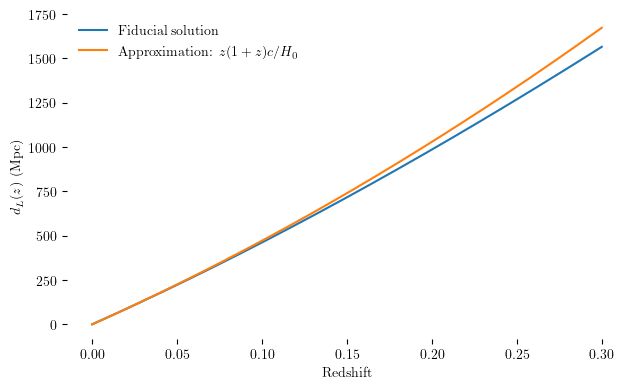

In [ ]:
x = np.linspace(0, 0.3, 1000)
y = Lum_distance(x)
approx_y = approx_lum_dist(x)
approx_hyper = approx_hypergeometric(x)

pdf = PdfPages('Lum_Dist.pdf')

plt.rcParams['figure.figsize'] = (4*1.618033988,4.)
plt.rcParams['figure.frameon'] = False

plt.box(False)
plt.xlabel("Redshift")
plt.ylabel(r"$d_L(z)$ (Mpc)")
plt.plot(x, y, c='C0', label="Fiducial solution")
plt.plot(x, approx_y, c='C1', label=r"Approximation: $z(1+z)c/H_0$")
plt.legend(frameon=False)
#plt.plot(x, approx_hyper, c='C2', label="Approximation")
#plt.show()
plt.tick_params(top='on', right='on', which='both')
plt.minorticks_off()
plt.tight_layout()
pdf.savefig()
pdf.close()